# One vs rest

# Algunas libreias que se usan en la implemntacion deOne vs Rest

In [378]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

# Funciones  es pecificas que se usan para aumentar la legibilidad de los codigos

In [379]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [380]:
def optimizar(theta, x_train, y_train):
    sigma = sigmoid(x_train@theta)
    theta = (1/m)*(x_train.T @ (sigma-y_train))
    return theta

In [381]:
def costo(theta, x_train, y_train):
    sigma = sigmoid(x_train@theta)
    error = (y_train*np.log(sigma) + (1-y_train)*np.log(1-sigma))
    return np.sum(error, axis= 0)

## Usando sklearn se carga el dataset de iris

In [382]:
iris = datasets.load_iris()

Este dataset esta formado por las siguientes partes:
<center>

| Entradas          | Salidas    |
|-------------------|------------|
| sepal length (cm) | setosa     |
| sepal length (cm) | versicolor |
| petal length (cm) | virginica  |
| petal width (cm)  |            |

</center>

En total cada caracteristica esta formada por 150 datos, y estos son clasificados en 3 salidas, las cuales estan presentadas por los numeros 0,1,2

Se cargan los datos en dos variables una de entradas y otra de salidas

In [383]:
x = iris["data"][::]
y = (iris["target"]).astype(np.int32).reshape(len(iris['target']),1)

Luego se nestandarizan los datos con respecto a la formula:

$$x = \frac{x_i + \mu}{\sigma}$$


In [384]:

for i in range(x.shape[1]):
    mean = x[:,i].mean()
    deviation =  x[:,i].std()
    x[:,i] = (x[:,i] - mean) / deviation

Aprovechando la implementacion de division de datos y su randomizacion de sklearn, se dividen y se randomizan los datos por sklearn

In [385]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

Finalmente se agrega un columna de unos al sistema, para generar una interseccion al momento de crear las predicciones en el caso  $x_i = 0$ 

In [386]:
x_train = np.c_[np.ones((len(x_train),1)), x_train]
x_test = np.c_[np.ones((len(x_test),1)), x_test]

# Metodo de One vs rest

El one vs rest esta formado por la comparacion de las caracteristicas, donde se comparan una de las caracteristicas vs las otras por ejemplo, si tenemos tres clases rojo, amarillo y azul, el primer caso se podria poner como:


$$ [Rojo]  vs [Azul, Amarillo] $$


En nuestro caso para este dataset se tendrian que comparar las tres salidas, de la siguiente manera:


$$ [setosa]  vs [versicolor, virginica] $$

$$ [versicolor]  vs [setosa, virginica ] $$

$$ [virginica]  vs [setosa, versicolor] $$


# $$ [setosa]  vs [versicolor, virginica] $$

In [388]:
theta_setosa = np.random.rand(x_train.shape[1]).reshape(x_train.shape[1],1)
theta_setosa

array([[0.01318265],
       [0.92012377],
       [0.35969992],
       [0.16523045],
       [0.17396848]])

In [389]:
eta = 0.8
n_iter = 10000

J_set = np.zeros(n_iter)
m = len(x_train)
y_train_set = (y_train == 0).astype(int)
for i in range(n_iter):
    J_set[i] = -(1/m)*costo(theta_setosa, x_train, y_train_set)
    theta_setosa = theta_setosa - eta * optimizar(theta_setosa, x_train, y_train_set)
theta_setosa

array([[-5.02535414],
       [-1.6215171 ],
       [ 3.22665092],
       [-5.12061759],
       [-4.63359951]])

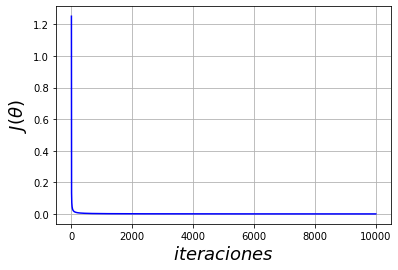

In [390]:
plt.plot(np.arange(n_iter), J_set, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [391]:
y_proba_set =np.round(sigmoid(theta_setosa.T @ x_test.T),2)
y_proba_set

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 1.]])

# $$ [versicolor]  vs [setosa, virginica ] $$



In [392]:
theta_versicolor = np.random.rand(x_train.shape[1]).reshape(x_train.shape[1],1)
theta_versicolor

array([[0.87162048],
       [0.47961132],
       [0.93693129],
       [0.71422897],
       [0.3587521 ]])

In [393]:
eta = 0.8
n_iter = 10000

J_vers = np.zeros(n_iter)

y_train_ver = (y_train == 1).astype(int)
for i in range(n_iter):
    J_vers[i] = -(1/m)*costo(theta_versicolor, x_train, y_train_ver)
    theta_versicolor = theta_versicolor - eta * optimizar(theta_versicolor, x_train, y_train_ver)
theta_versicolor

array([[-0.96992951],
       [-0.93760626],
       [-0.94117175],
       [ 3.50432562],
       [-2.48913875]])

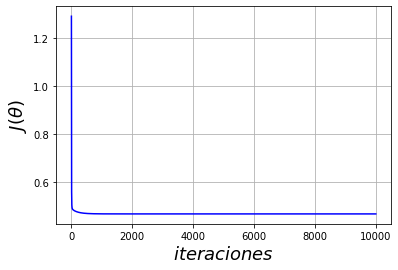

In [394]:
plt.plot(np.arange(n_iter), J_vers, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [395]:
y_proba_ver =np.round(sigmoid(theta_versicolor.T @ x_test.T),2)
y_proba_ver

array([[0.59, 0.27, 0.37, 0.78, 0.25, 0.73, 0.92, 0.75, 0.46, 0.45, 0.02,
        0.31, 0.65, 0.56, 0.37, 0.23, 0.07, 0.31, 0.67, 0.34, 0.03, 0.39,
        0.2 , 0.63, 0.76, 0.11, 0.12, 0.29, 0.84, 0.47, 0.27, 0.77, 0.38,
        0.9 , 0.57, 0.29, 0.06, 0.17]])

# $$ [virginica]  vs [setosa, versicolor] $$

In [396]:
theta_virginica = np.random.rand(x_train.shape[1]).reshape(x_train.shape[1],1)
theta_virginica

array([[0.86849243],
       [0.06428019],
       [0.71507494],
       [0.30684568],
       [0.12427341]])

In [397]:
eta = 0.8
n_iter = 10000

J_vir = np.zeros(n_iter)

y_train_vir = (y_train == 2).astype(int)
for i in range(n_iter):
    J_vir[i] = -(1/m)*costo(theta_virginica, x_train, y_train_vir)
    theta_virginica = theta_virginica - eta * optimizar(theta_virginica, x_train, y_train_vir)
theta_virginica

array([[-13.40853633],
       [ -0.92374479],
       [ -1.8738014 ],
       [ 10.40609009],
       [  9.81566895]])

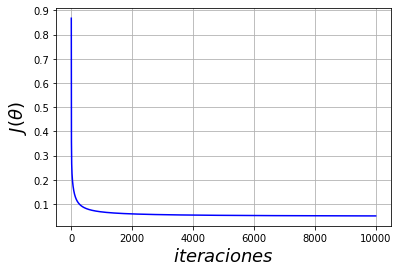

In [398]:
plt.plot(np.arange(n_iter), J_vir, "b-")
plt.xlabel("$iteraciones$", fontsize=18)
plt.ylabel(r"$J(\theta)$", fontsize=18)
plt.grid(True)
plt.show()

In [399]:
y_proba_vir = np.round(sigmoid(theta_virginica.T @ x_test.T),2)
y_proba_vir

array([[0.93, 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.  , 0.  , 0.98, 0.  ,
        1.  , 0.  , 0.99, 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.02,
        1.  , 1.  , 0.71, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99,
        0.79, 0.01, 0.  , 0.  , 0.  ]])

In [400]:
compar = np.concatenate((y_proba_set, y_proba_ver, y_proba_vir), axis =0).T
compar

array([[0.  , 0.59, 0.93],
       [1.  , 0.27, 0.  ],
       [0.  , 0.37, 0.  ],
       [0.  , 0.78, 0.  ],
       [0.  , 0.25, 0.  ],
       [0.  , 0.73, 0.14],
       [0.  , 0.92, 0.  ],
       [0.  , 0.75, 0.  ],
       [0.  , 0.46, 0.  ],
       [0.  , 0.45, 0.98],
       [1.  , 0.02, 0.  ],
       [0.  , 0.31, 1.  ],
       [0.  , 0.65, 0.  ],
       [0.  , 0.56, 0.99],
       [0.  , 0.37, 0.  ],
       [1.  , 0.23, 0.  ],
       [0.  , 0.07, 1.  ],
       [1.  , 0.31, 0.  ],
       [0.  , 0.67, 1.  ],
       [0.  , 0.34, 1.  ],
       [1.  , 0.03, 0.  ],
       [0.  , 0.39, 0.02],
       [0.  , 0.2 , 1.  ],
       [0.  , 0.63, 1.  ],
       [0.  , 0.76, 0.71],
       [1.  , 0.11, 0.  ],
       [1.  , 0.12, 0.  ],
       [1.  , 0.29, 0.  ],
       [0.  , 0.84, 0.  ],
       [0.  , 0.47, 0.  ],
       [0.  , 0.27, 0.  ],
       [0.  , 0.77, 0.  ],
       [0.  , 0.38, 0.99],
       [0.  , 0.9 , 0.79],
       [0.  , 0.57, 0.01],
       [1.  , 0.29, 0.  ],
       [1.  , 0.06, 0.  ],
 

In [401]:

prediction_final = []
for i in range(len(compar)):
    #print(compar[i])
    index_value = compar[i].argmax()
    prediction_final.append(index_value)
prediction_final = np.array(prediction_final).reshape(1, len(prediction_final))


In [402]:
last_data = np.concatenate((y_proba_set, y_proba_ver, y_proba_vir, prediction_final, y_test.reshape(1, len(y_test)) ), axis =0).T
last_data

array([[0.  , 0.59, 0.93, 2.  , 2.  ],
       [1.  , 0.27, 0.  , 0.  , 0.  ],
       [0.  , 0.37, 0.  , 1.  , 1.  ],
       [0.  , 0.78, 0.  , 1.  , 1.  ],
       [0.  , 0.25, 0.  , 1.  , 1.  ],
       [0.  , 0.73, 0.14, 1.  , 1.  ],
       [0.  , 0.92, 0.  , 1.  , 1.  ],
       [0.  , 0.75, 0.  , 1.  , 1.  ],
       [0.  , 0.46, 0.  , 1.  , 1.  ],
       [0.  , 0.45, 0.98, 2.  , 2.  ],
       [1.  , 0.02, 0.  , 0.  , 0.  ],
       [0.  , 0.31, 1.  , 2.  , 2.  ],
       [0.  , 0.65, 0.  , 1.  , 1.  ],
       [0.  , 0.56, 0.99, 2.  , 2.  ],
       [0.  , 0.37, 0.  , 1.  , 1.  ],
       [1.  , 0.23, 0.  , 0.  , 0.  ],
       [0.  , 0.07, 1.  , 2.  , 2.  ],
       [1.  , 0.31, 0.  , 0.  , 0.  ],
       [0.  , 0.67, 1.  , 2.  , 2.  ],
       [0.  , 0.34, 1.  , 2.  , 2.  ],
       [1.  , 0.03, 0.  , 0.  , 0.  ],
       [0.  , 0.39, 0.02, 1.  , 1.  ],
       [0.  , 0.2 , 1.  , 2.  , 2.  ],
       [0.  , 0.63, 1.  , 2.  , 2.  ],
       [0.  , 0.76, 0.71, 1.  , 2.  ],
       [1.  , 0.11, 0.  ,

In [403]:
cm = confusion_matrix(y_test, prediction_final.flatten())
cm

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 10]], dtype=int64)

In [404]:
actual = 0
total = 0

for i in range(len(cm)):
    for j in range(len(cm[i])):
        if i == j:
            actual = cm[i][j] + actual
        total = cm[i][j] + total
actual / total

0.9473684210526315

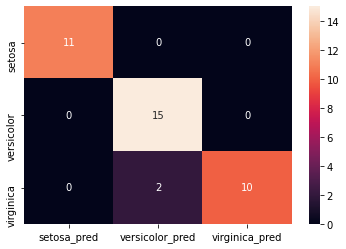

In [405]:
y_axis_labels = iris["target_names"]
x_axis_labels = ['setosa_pred', 'versicolor_pred', 'virginica_pred']
f = sns.heatmap(cm, annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [406]:
print(classification_report(y_test,  prediction_final.flatten(), target_names= iris["target_names"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.83      0.91        12

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.95        38
weighted avg       0.95      0.95      0.95        38

